In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_path = "../raw/train.csv"
df = pd.read_csv(raw_path)

print("Shape of raw dataset:", df.shape)
df.head()

Shape of raw dataset: (10000, 9)


,field_id,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi,yield
0,F00001,6.25,2.66,41.6,25.2,70,110.2,0.46,4105.8
1,F00002,6.70,3.66,40.2,26.9,78,126.3,0.59,4247.8
2,F00003,7.21,3.45,40.0,27.6,66,109.4,0.64,4021.8
3,F00004,5.73,2.48,56.9,29.6,79,155.3,0.62,4326.8
4,F00005,6.88,3.61,30.6,25.0,80,172.6,0.62,3708.0


In [5]:
#dropping
if "field_id" in df.columns:
    df = df.drop(columns=["field_id"])

In [6]:
#splitting
X = df.drop(columns=["yield"])
y = df["yield"]

In [7]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled feature sample:")
X_scaled_df.head()


Scaled feature sample:


,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi
0,-0.445840,-0.123252,-0.388080,-1.032912,-0.783298,-1.295679,-1.146956
1,0.330116,1.270264,-0.549883,-0.054078,0.602028,-0.596459,0.150923
2,1.209533,0.977626,-0.572998,0.348972,-1.475961,-1.330423,0.650108
3,-1.342501,-0.374085,1.380200,1.500541,0.775194,0.663006,0.450434
4,0.640498,1.200588,-1.659392,-1.148068,0.948360,1.414343,0.450434


In [8]:
# Interaction & Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X_scaled_df)

X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

print("Polynomial features shape:", X_poly_df.shape)
X_poly_df.head()

Polynomial features shape: (10000, 35)


,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi,soil_ph^2,soil_ph organic_matter,soil_ph sand_pct,...,temperature^2,temperature humidity,temperature rainfall,temperature ndvi,humidity^2,humidity rainfall,humidity ndvi,rainfall^2,rainfall ndvi,ndvi^2
0,-0.445840,-0.123252,-0.388080,-1.032912,-0.783298,-1.295679,-1.146956,0.198774,0.054951,0.173022,...,1.066906,0.809078,1.338322,1.184704,0.613556,1.014903,0.898409,1.678785,1.486087,1.315508
1,0.330116,1.270264,-0.549883,-0.054078,0.602028,-0.596459,0.150923,0.108977,0.419334,-0.181525,...,0.002924,-0.032556,0.032255,-0.008162,0.362438,-0.359085,0.090860,0.355763,-0.090020,0.022778
2,1.209533,0.977626,-0.572998,0.348972,-1.475961,-1.330423,0.650108,1.462970,1.182470,-0.693060,...,0.121781,-0.515069,-0.464280,0.226869,2.178462,1.963653,-0.959534,1.770026,-0.864918,0.422640
3,-1.342501,-0.374085,1.380200,1.500541,0.775194,0.663006,0.450434,1.802308,0.502210,-1.852920,...,2.251623,1.163210,0.994868,0.675895,0.600926,0.513959,0.349174,0.439578,0.298641,0.202891
4,0.640498,1.200588,-1.659392,-1.148068,0.948360,1.414343,0.450434,0.410238,0.768975,-1.062838,...,1.318061,-1.088782,-1.623762,-0.517129,0.899386,1.341306,0.427174,2.000365,0.637068,0.202891


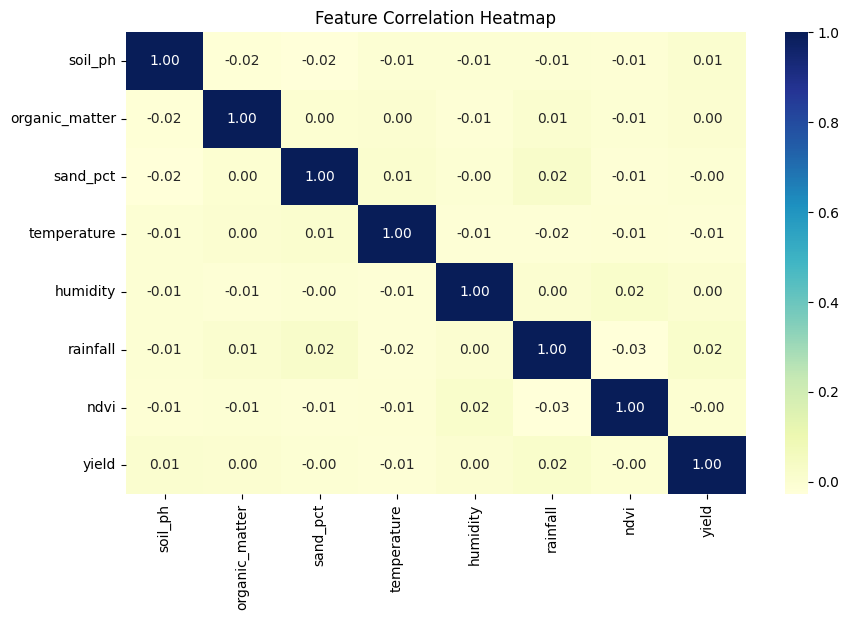

In [11]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
